## Goal: create word cloud from the lyrics

In [ ]:
!pip install wordcloud

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

#### - import artist_1 and artist_2 csv

In [4]:
artist_1 = pd.read_csv('artist_1.csv', index_col=0)
artist_2 = pd.read_csv('artist_2.csv', index_col=0)

In [5]:
artist = pd.concat([artist_1, artist_2], axis=0)
artist

song_title  \
0                  Alligator   
2                       Ahay   
3                     Róróró   
4       Waiting for the Snow   
5           Vulture, Vulture   
..                       ...   
157  where we are [Acoustic]   
163                Democracy   
167                 Old Lady   
168          Soundtrack Song   
178       Sleep On The Floor   

                                                l_link  \
0    https://www.lyrics.com//lyric/36182049/Of+Mons...   
2    https://www.lyrics.com//lyric/36406257/Of+Mons...   
3    https://www.lyrics.com//lyric/36406262/Of+Mons...   
4    https://www.lyrics.com//lyric/36406261/Of+Mons...   
5    https://www.lyrics.com//lyric/36406260/Of+Mons...   
..                                                 ...   
157  https://www.lyrics.com//lyric-lf/7526166/The+L...   
163  https://www.lyrics.com//lyric/36521451/The+Lum...   
167  https://www.lyrics.com//lyric/36521460/The+Lum...   
168  https://www.lyrics.com//lyric/36521450/The+Lum...   
178  https://www.lyrics.com//lyric/32824629/The+Lum...   

                                                lyrics          artist_name  
0    Hey Hey  I see color raining down Feral feelin...  Of Monsters and Men  
2    I know that I'm wrong And now we're both sitti...  Of Monsters and Men  
3    I am up with the sunrise I'm tired and I think...  Of Monsters and Men  
4    I'm waiting for the snow I'm waiting for visio...  Of Monsters and Men  
5    He lives in the darkness, he's calling my name...  Of Monsters and Men  
..                                                 ...                  ...  
157  Where we are (where we are) I don't know where...        The Lumineers  
163  It's coming through a hole in the air From tho...        The Lumineers  
167  An old lady crosses the street And as she wave...        The Lumineers  
168  Loneliness, oh won't you let me be Let me be a...        The Lumineers  
178  Pack yourself a toothbrush dear Pack yourself ...        The Lumineers  

[125 rows x 4 columns]

#### - feature vectorizing

In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(artist['lyrics'])
X

<125x1900 sparse matrix of type '<class 'numpy.float64'>'
	with 5798 stored elements in Compressed Sparse Row format>

In [10]:
# create dataframe from the vector
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names(), index=artist['artist_name'])
df

18  3am   44  able  abyss   account  act  actress  \
artist_name                                                               
Of Monsters and Men  0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
Of Monsters and Men  0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
Of Monsters and Men  0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
Of Monsters and Men  0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
Of Monsters and Men  0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
...                  ...  ...  ...   ...    ...       ...  ...      ...   
The Lumineers        0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
The Lumineers        0.0  0.0  0.0   0.0    0.0  0.046372  0.0      0.0   
The Lumineers        0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
The Lumineers        0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   
The Lumineers        0.0  0.0  0.0   0.0    0.0  0.000000  0.0      0.0   

                     admit  advice  ...  yelled  yellow       yes  yesterdays  \
artist_name                         ...                                         
Of Monsters and Men    0.0     0.0  ...     0.0     0.0  0.000000         0.0   
Of Monsters and Men    0.0     0.0  ...     0.0     0.0  0.000000         0.0   
Of Monsters and Men    0.0     0.0  ...     0.0     0.0  0.000000         0.0   
Of Monsters and Men    0.0     0.0  ...     0.0     0.0  0.000000         0.0   
Of Monsters and Men    0.0     0.0  ...     0.0     0.0  0.000000         0.0   
...                    ...     ...  ...     ...     ...       ...         ...   
The Lumineers          0.0     0.0  ...     0.0     0.0  0.000000         0.0   
The Lumineers          0.0     0.0  ...     0.0     0.0  0.000000         0.0   
The Lumineers          0.0     0.0  ...     0.0     0.0  0.000000         0.0   
The Lumineers          0.0     0.0  ...     0.0     0.0  0.000000         0.0   
The Lumineers          0.0     0.0  ...     0.0     0.0  0.074853         0.0   

                      yo  yon  york  young  younger  youth  
artist_name                                                 
Of Monsters and Men  0.0  0.0   0.0    0.0      0.0    0.0  
Of Monsters and Men  0.0  0.0   0.0    0.0      0.0    0.0  
Of Monsters and Men  0.0  0.0   0.0    0.0      0.0    0.0  
Of Monsters and Men  0.0  0.0   0.0    0.0      0.0    0.0  
Of Monsters and Men  0.0  0.0   0.0    0.0      0.0    0.0  
...                  ...  ...   ...    ...      ...    ...  
The Lumineers        0.0  0.0   0.0    0.0      0.0    0.0  
The Lumineers        0.0  0.0   0.0    0.0      0.0    0.0  
The Lumineers        0.0  0.0   0.0    0.0      0.0    0.0  
The Lumineers        0.0  0.0   0.0    0.0      0.0    0.0  
The Lumineers        0.0  0.0   0.0    0.0      0.0    0.0  

[125 rows x 1900 columns]

#### - create word cloud for specific word

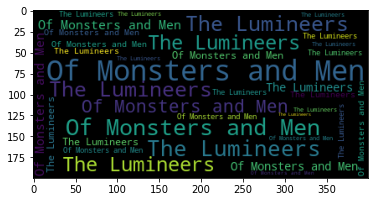

In [22]:
wordcloud = WordCloud().generate_from_frequencies(df['cause'])
plt.imshow(wordcloud)

#### - create word cloud with all words from both artists

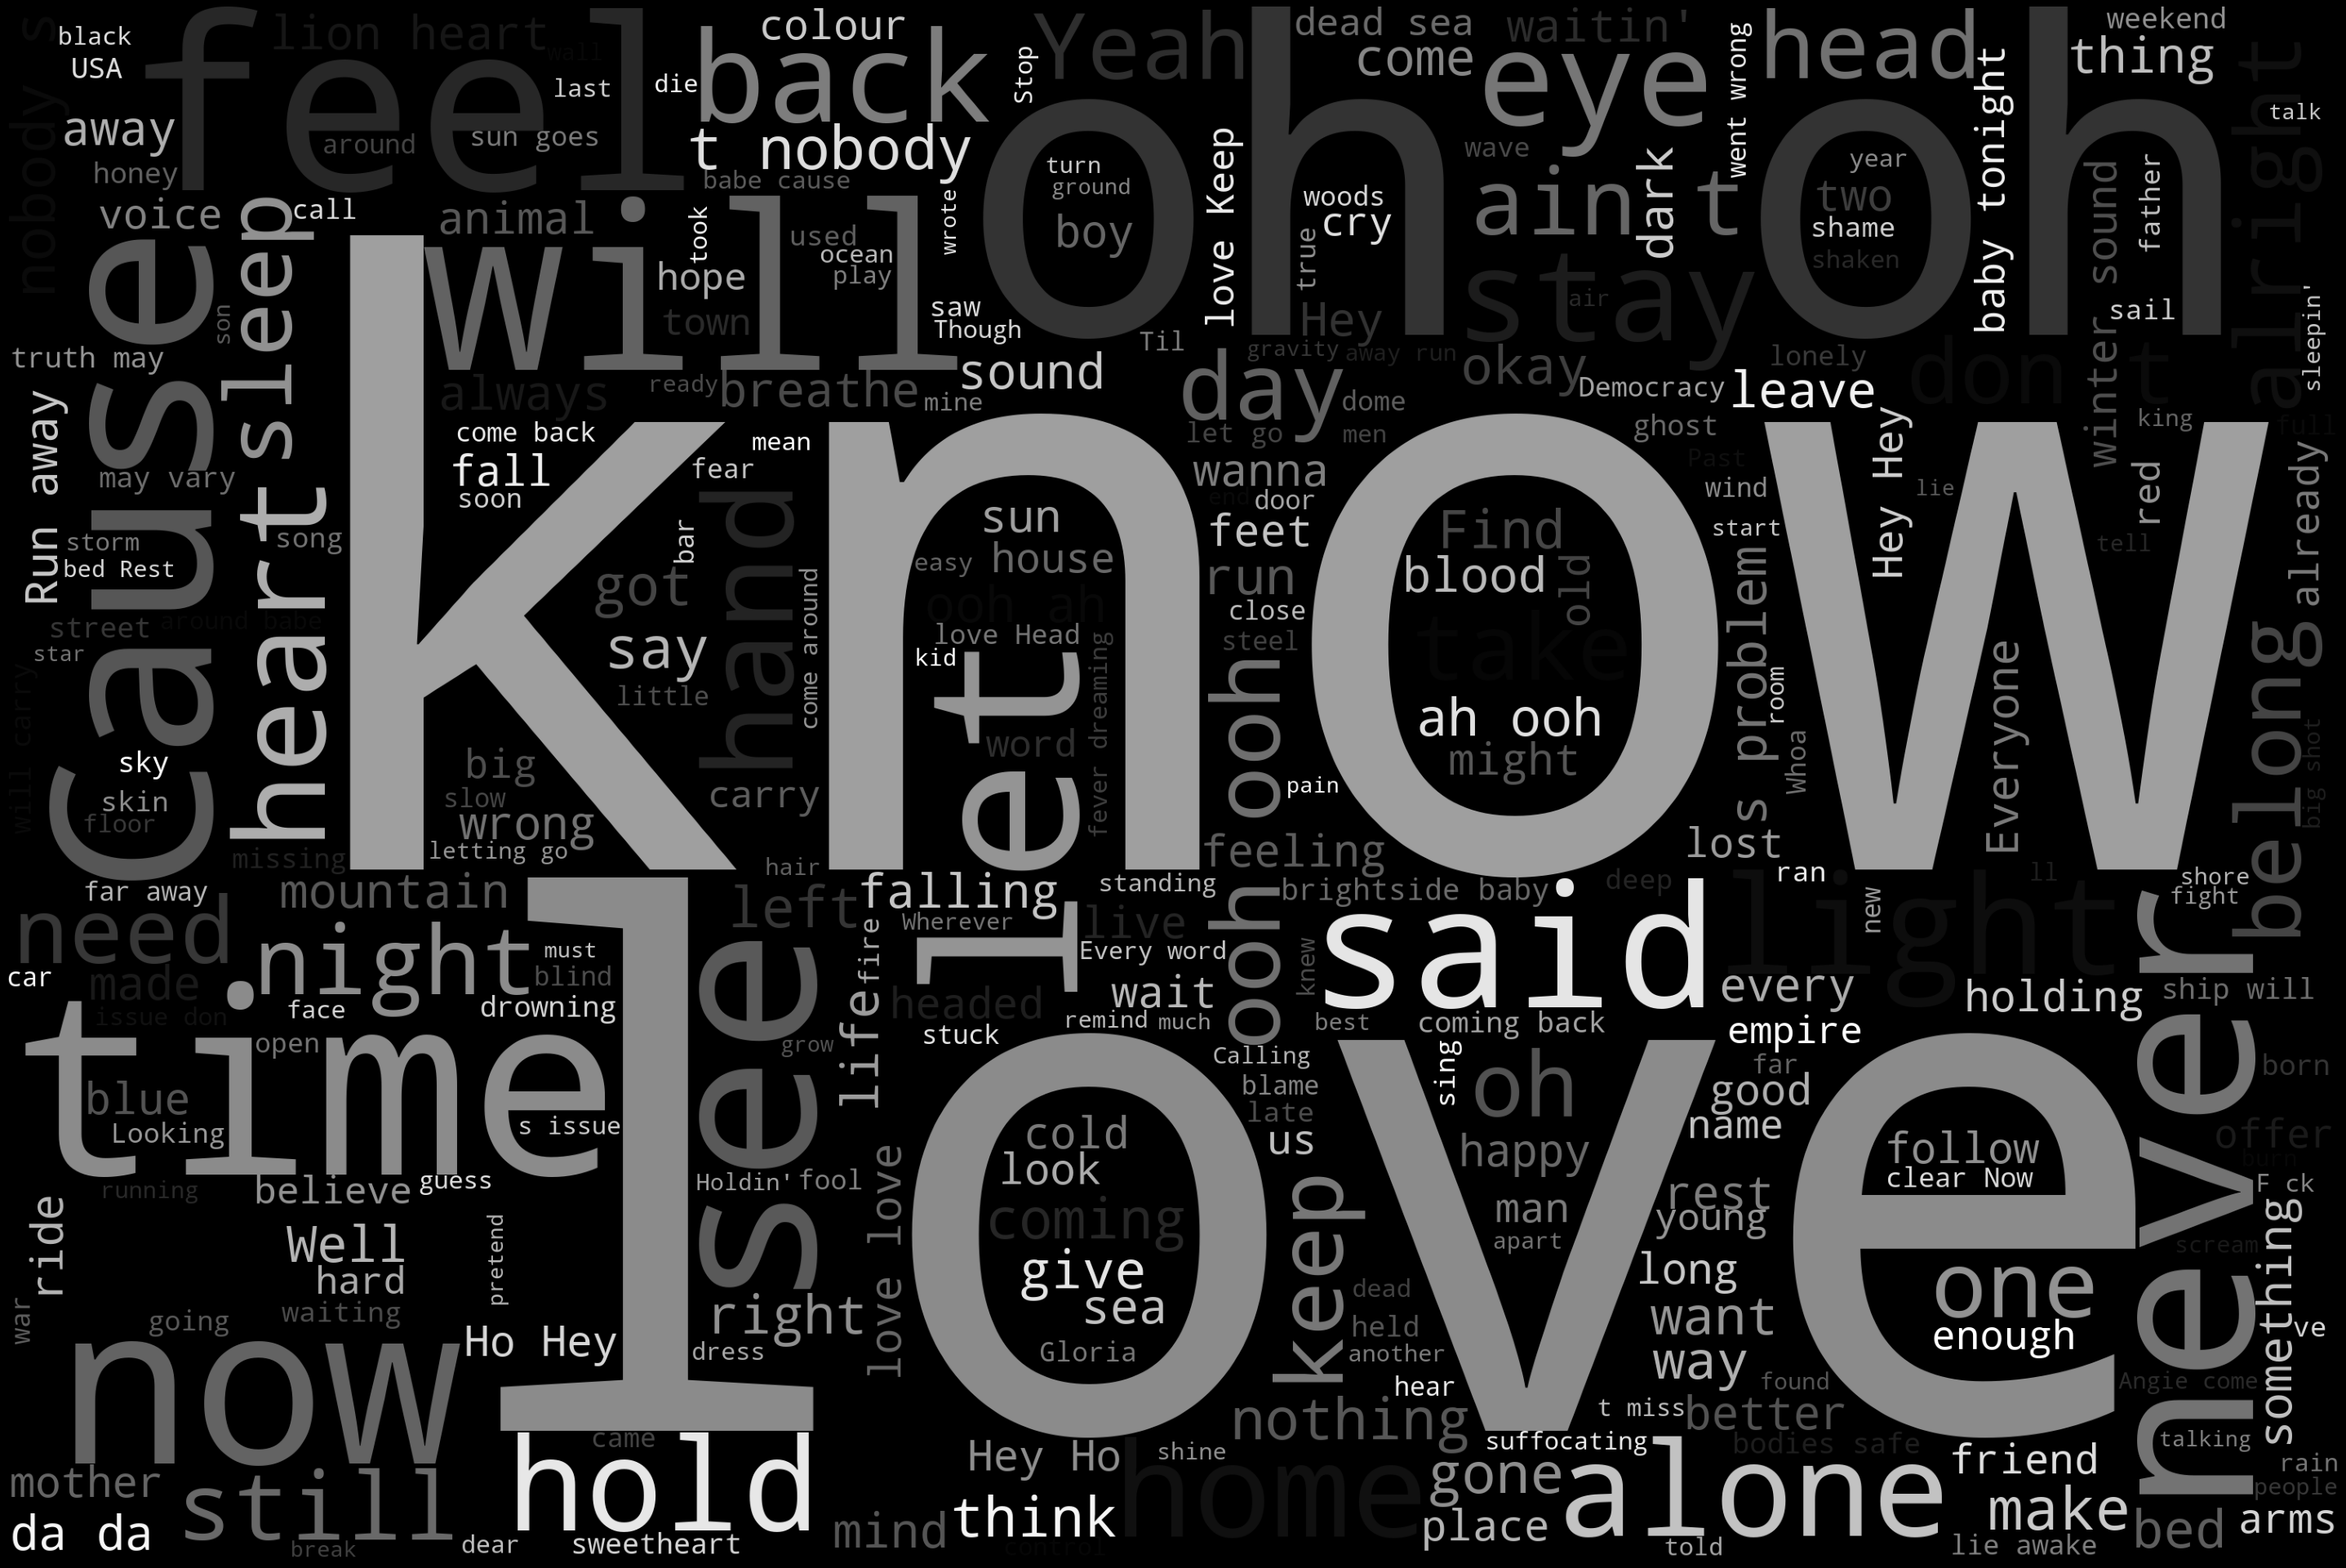

In [23]:
text = artist['lyrics'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    include_numbers=False,
    relative_scaling=0.5,
    colormap= 'gist_gray',
    max_words=300).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

#### - create word cloud with all words from 'The Lumineers'

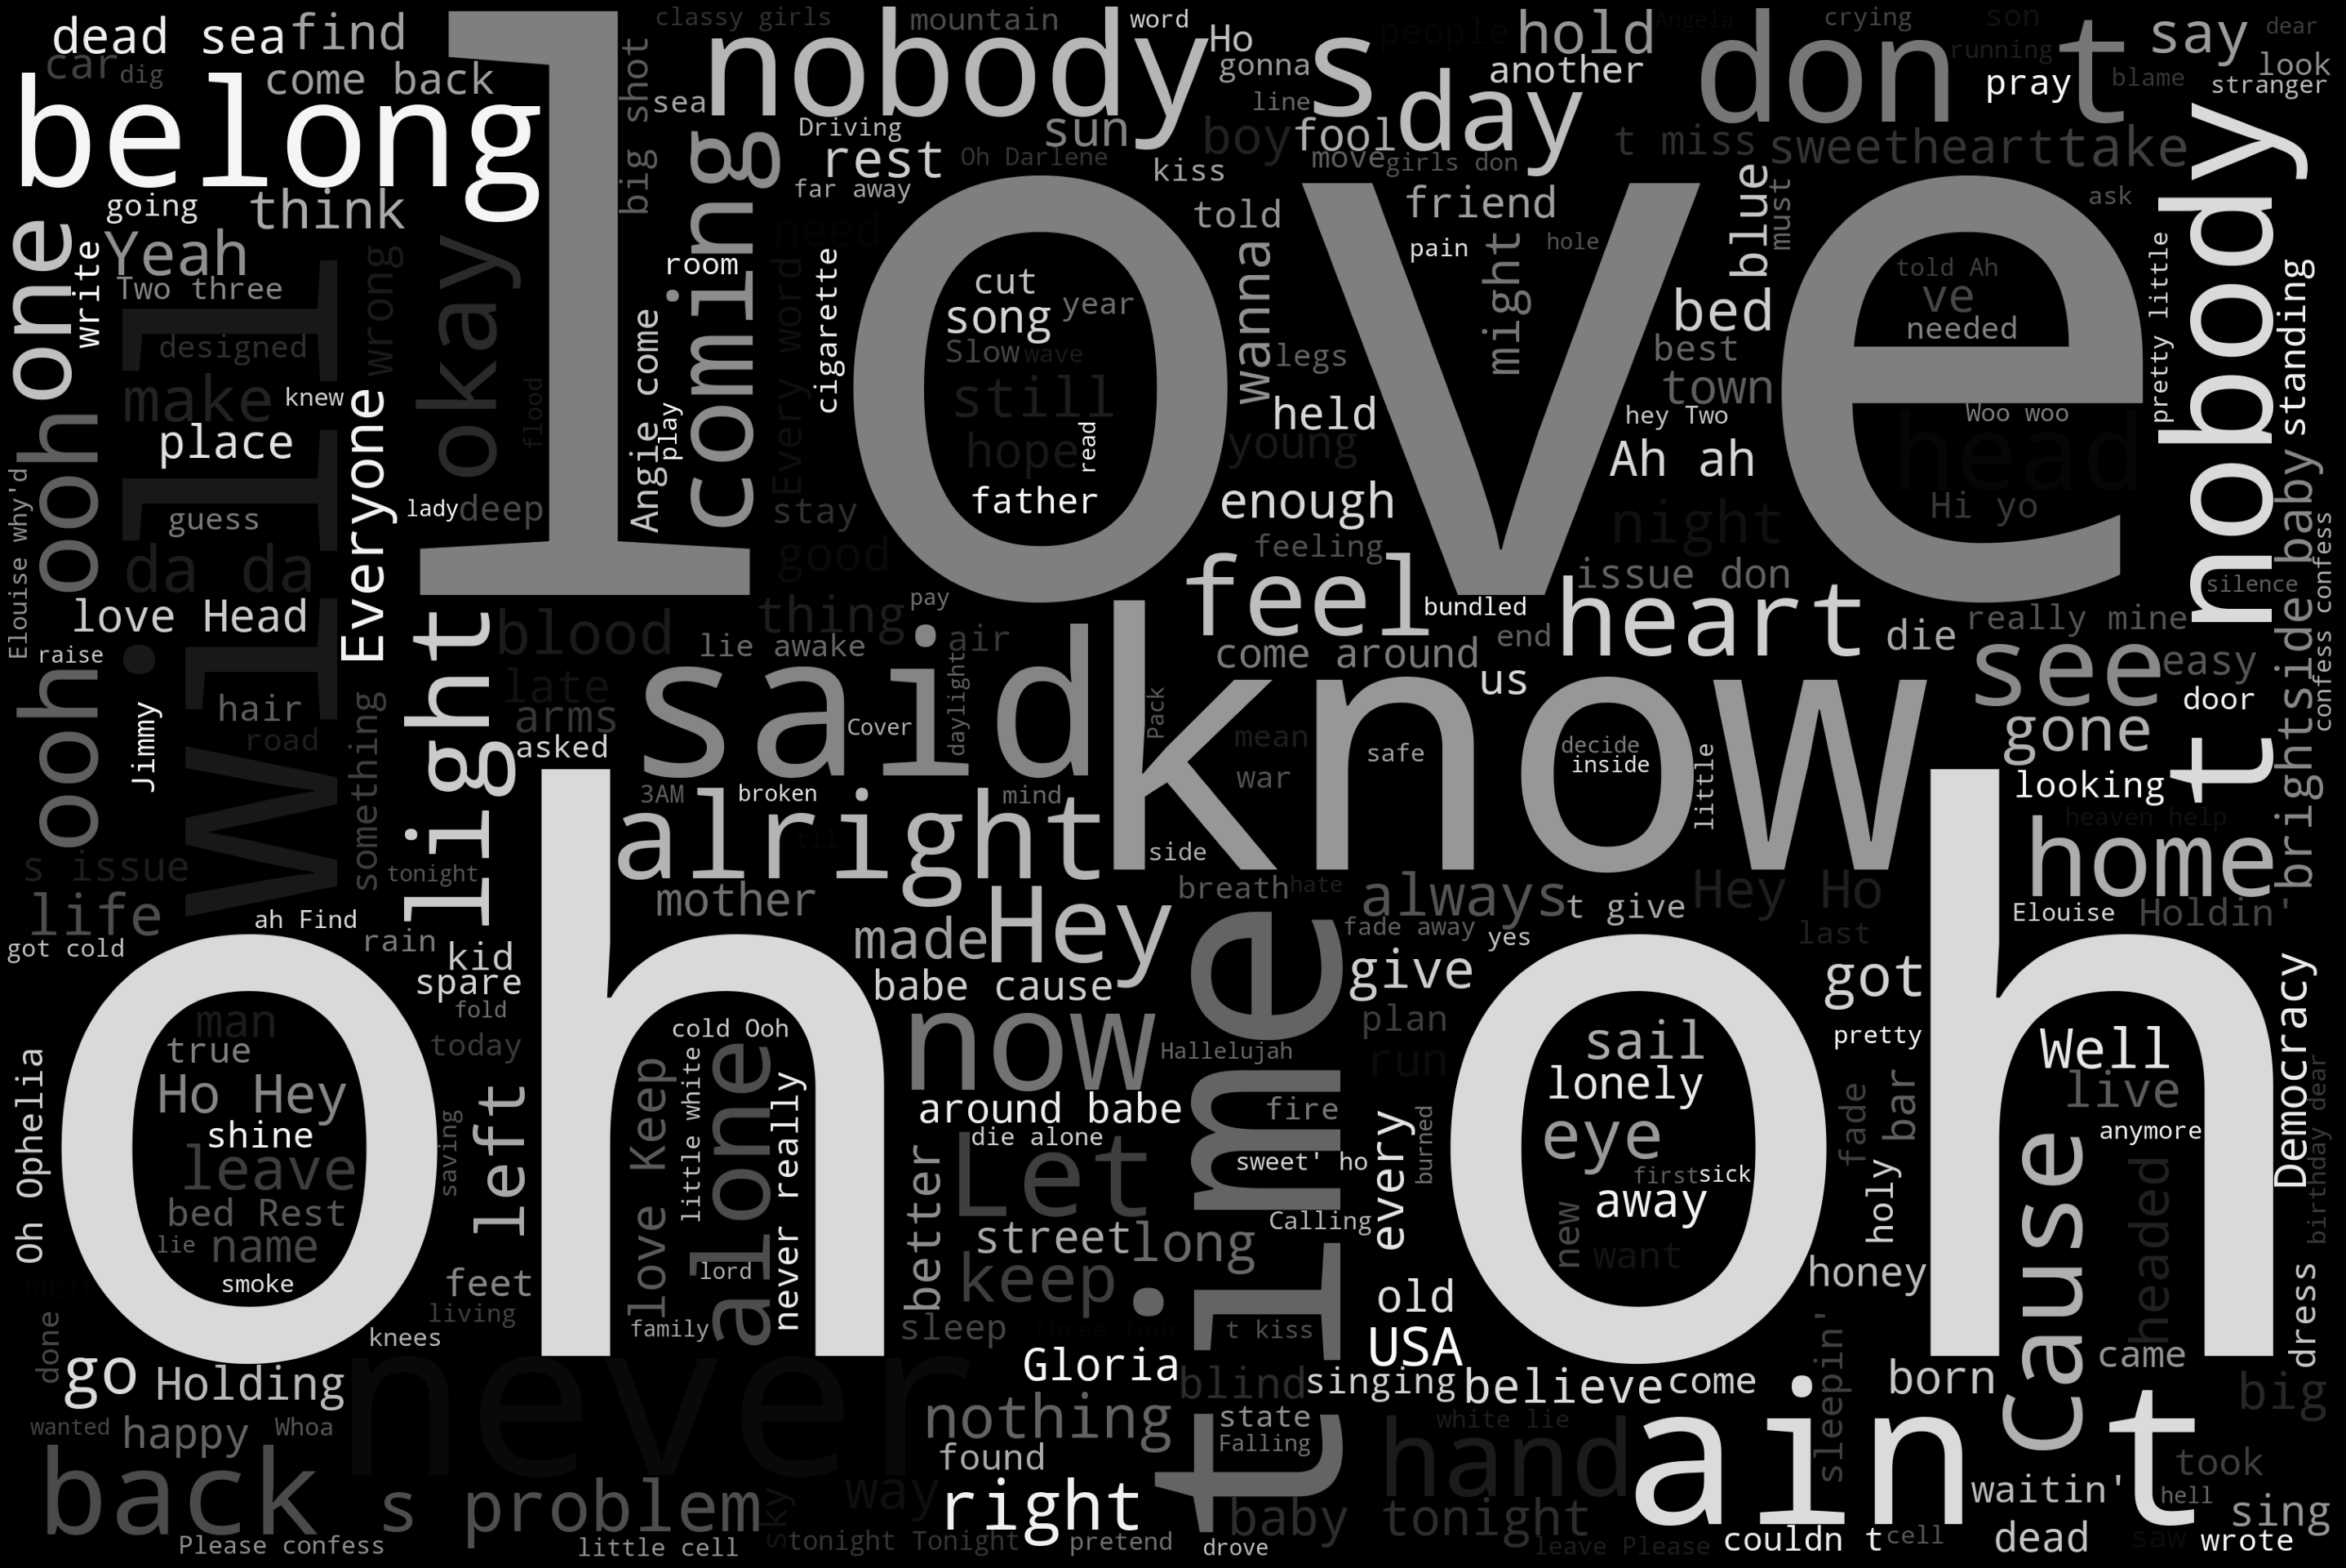

In [26]:
text = artist[artist['artist_name'] == 'The Lumineers']['lyrics'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    include_numbers=False,
    relative_scaling=0.5,
    colormap= 'gist_gray',
    max_words=300).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

#### - create word cloud with all words from 'Of Monsters and Men'

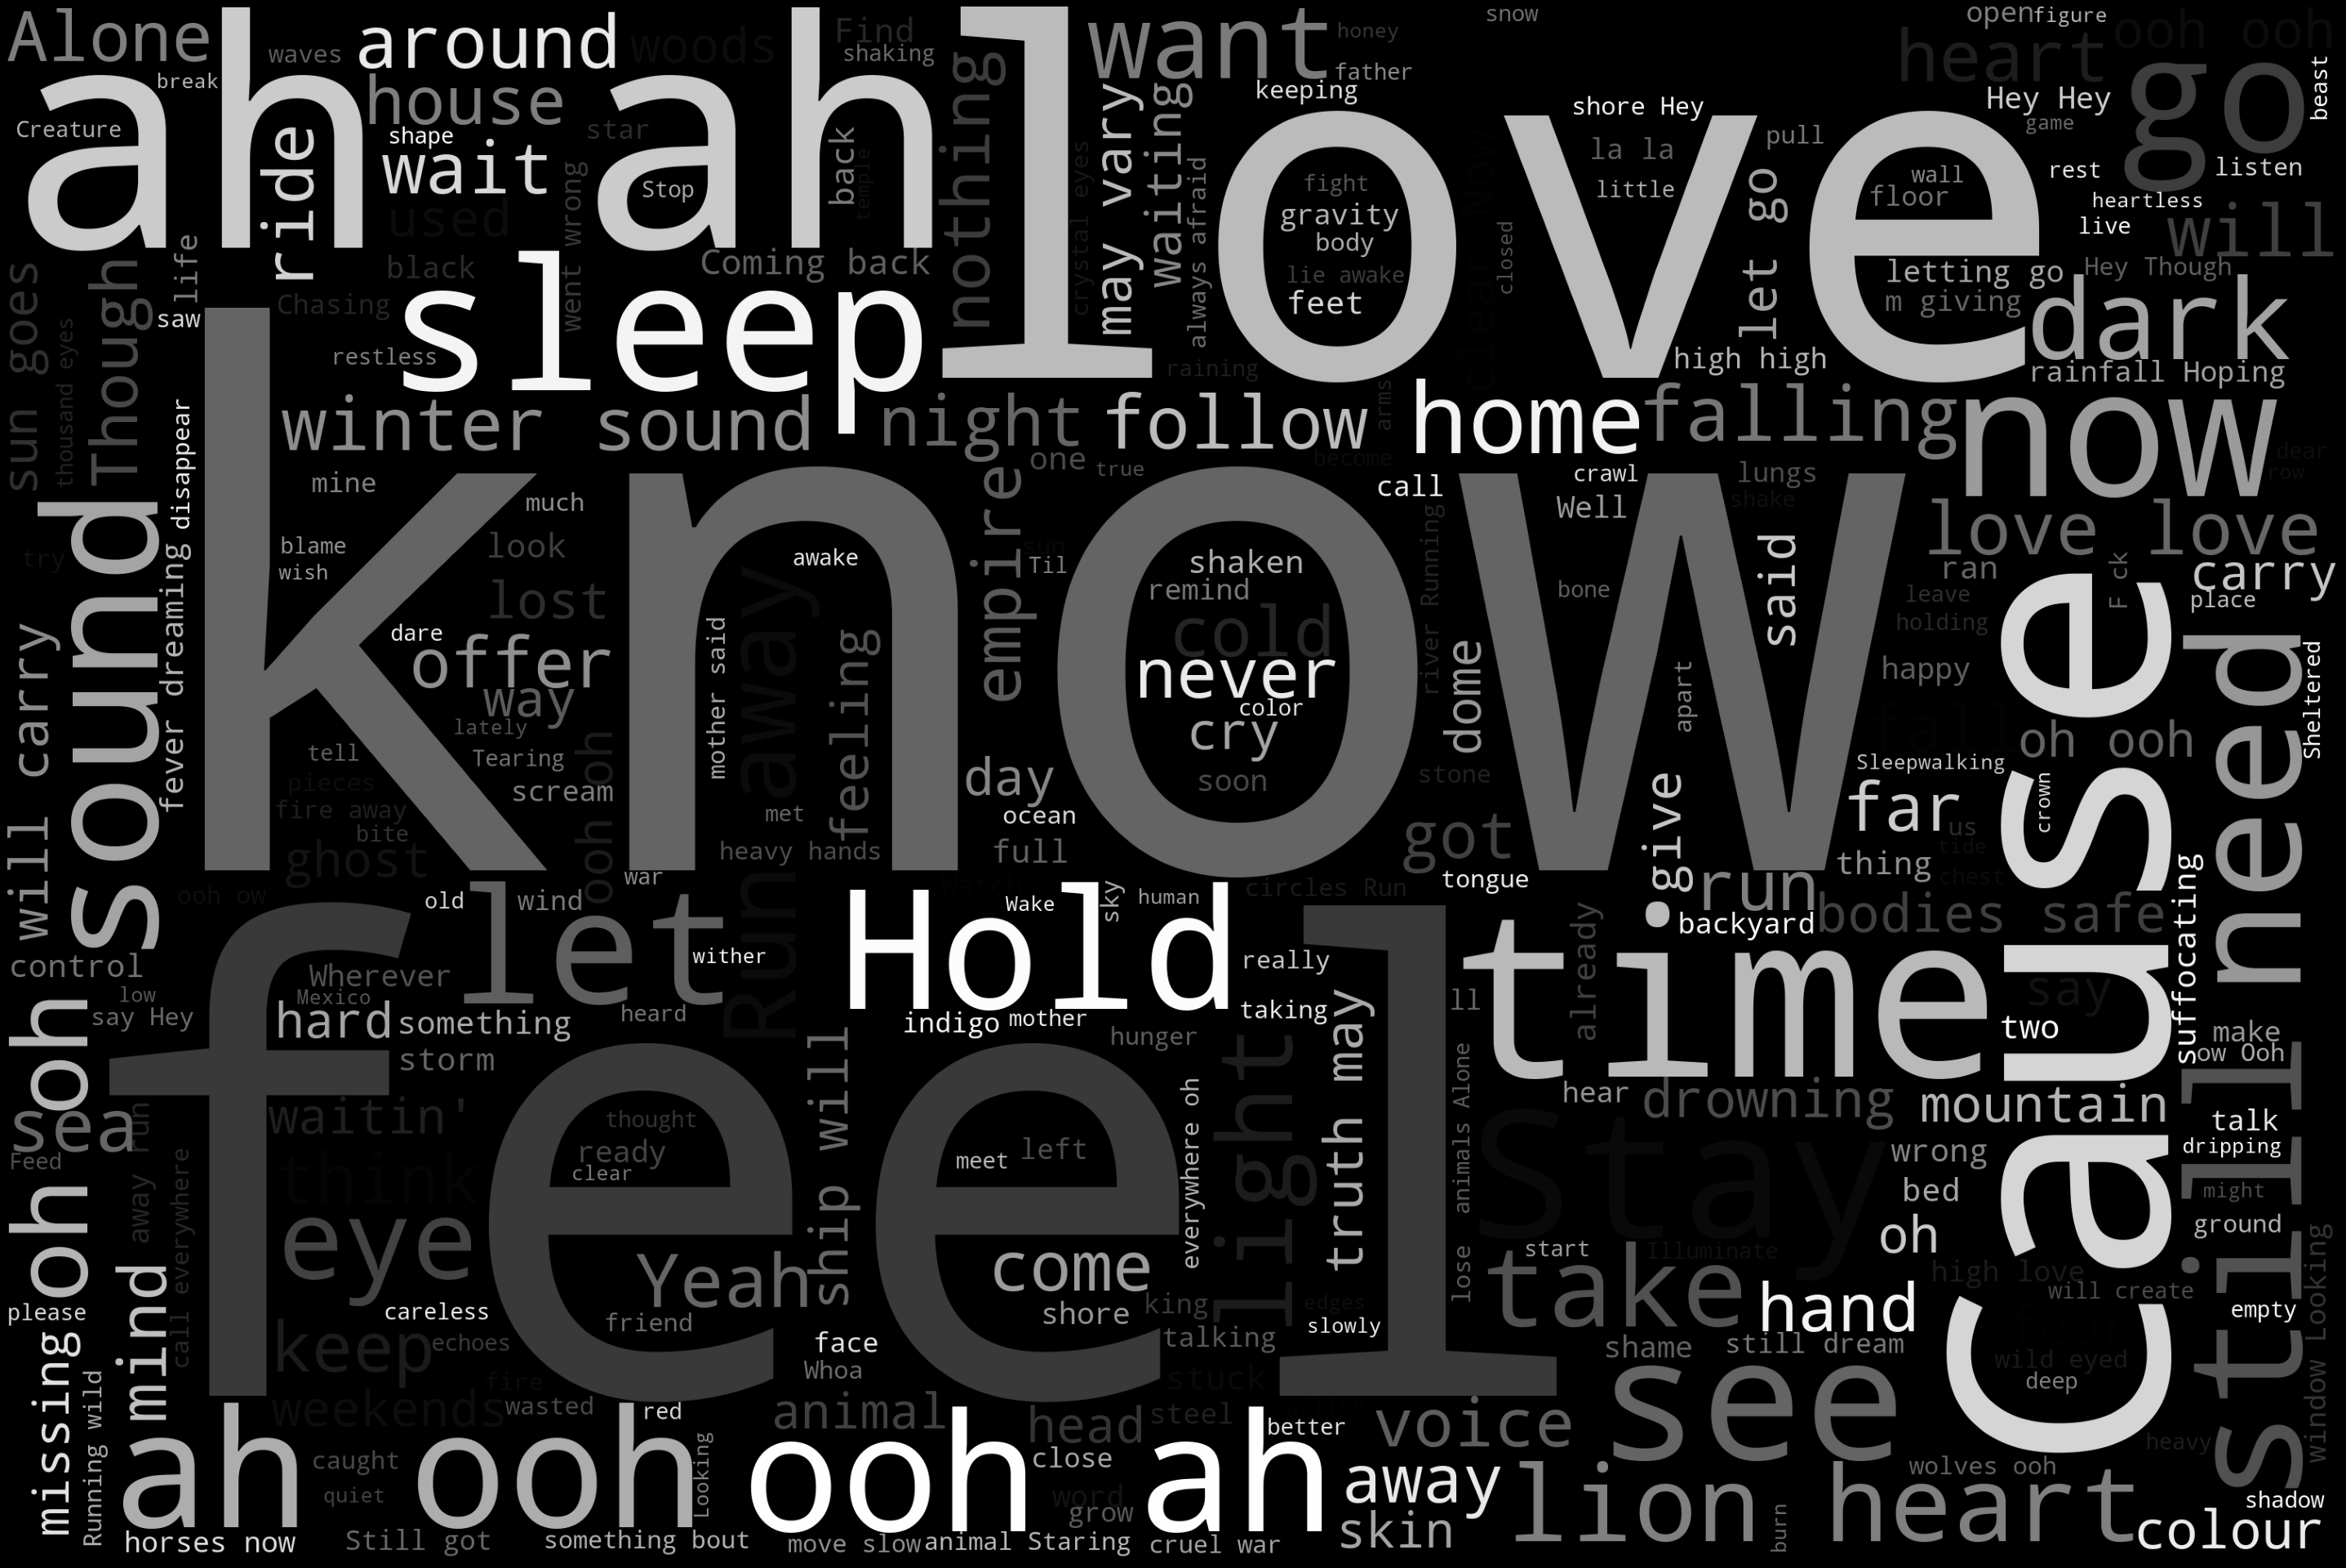

In [28]:
text = artist[artist['artist_name'] == 'Of Monsters and Men']['lyrics'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    include_numbers=False,
    relative_scaling=0.5,
    colormap= 'gist_gray',
    max_words=300).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()